WeatherPy Analysis by Zeshaun Subhani

Observable trends:

1. The largest concentration of max temperatures were occurring in latitudes between 0 and +40. Latitudes between 0 and 40 are closer to the equator and in the Northern Hemisphere where the current season is summer; so the warmer temperatures are expected at this time of the year for those coordinates.
2. The majority of wind speed recorded were between 0 and 10 mph across all latitudes. That means most of the cities randomly selected were not experiencing very windy conditions.
3. Of the cities randomly selected, there was a greater amount of cloudiness in cities in the Northern Hemisphere (above 0 latitude) compared to cities in the Southern Hemisphere (below 0 latitude).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
cities

['necochea',
 'codrington',
 'mataura',
 'cape town',
 'marcona',
 'jamestown',
 'khatanga',
 'busselton',
 'east london',
 'new norfolk',
 'abha',
 'hobart',
 'taolanaro',
 'puerto ayora',
 'ribeira grande',
 'butaritari',
 'barrow',
 'laguna',
 'bredasdorp',
 'sept-iles',
 'lesnoy',
 'castro',
 'acapulco',
 'vaini',
 'oruro',
 'tasiilaq',
 'basco',
 'ushuaia',
 'edd',
 'albany',
 'victoria',
 'port alfred',
 'mikuni',
 'constantine',
 'rungata',
 'saint-pierre',
 'chokurdakh',
 'lompoc',
 'houlton',
 'rikitea',
 'warqla',
 'darlawn',
 'thompson',
 'palu',
 'umm kaddadah',
 'rio grande',
 'weligama',
 'tsihombe',
 'ust-nera',
 'surt',
 'bethel',
 'belushya guba',
 'mitsamiouli',
 'kapaa',
 'kashi',
 'nikolskoye',
 'punta arenas',
 'raudeberg',
 'kaliua',
 'alice springs',
 'mana',
 'tiksi',
 'kaitangata',
 'kruisfontein',
 'antalaha',
 'qaanaaq',
 'ovalle',
 'hermanus',
 'upernavik',
 'tual',
 'tarime',
 'yirol',
 'atuona',
 'ponta do sol',
 'flinders',
 'pisco',
 'comodoro rivadavia'

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [5]:
#NOTE: I'm finding that some cities that are generated by citipy are NOT in the city list for OpenWeatherMap
# one example is anderma (which was a city generated by citipy)
# OpenWeatherMap shows the following json response for anderma:
# {
#"cod": "404",
#"message": "city not found"
#}

#So what I'm going to do is take each of the city names in the cities list (generated by citipy)
#and check whether cod returns 404 (ie city not found) with an API call to OpenWeatherMap
#if it does return cod value of 404, then i'm not going to include that city name in the next part of the code 
#when we actually use the OpenWeatherMap API to get max temperature, humidity, cloudiness, and wind speed

#also note this section takes long time to run but the code does run and creates a new list called owm_cities so be patient

#new list of cities that are actually found in OpenWeatherMap API
owm_cities = []

for city in cities:
    params = {
        'q' : city,
    }
    city_found_response = requests.get(url, params=params).json()
    city_cod = city_found_response['cod']
    if city_cod != "404":
        owm_cities.append(city)

owm_cities

['necochea',
 'codrington',
 'mataura',
 'cape town',
 'jamestown',
 'khatanga',
 'busselton',
 'east london',
 'new norfolk',
 'abha',
 'hobart',
 'puerto ayora',
 'ribeira grande',
 'butaritari',
 'barrow',
 'laguna',
 'bredasdorp',
 'sept-iles',
 'lesnoy',
 'castro',
 'acapulco',
 'vaini',
 'oruro',
 'tasiilaq',
 'basco',
 'ushuaia',
 'edd',
 'albany',
 'victoria',
 'port alfred',
 'mikuni',
 'constantine',
 'saint-pierre',
 'chokurdakh',
 'lompoc',
 'houlton',
 'rikitea',
 'darlawn',
 'thompson',
 'palu',
 'umm kaddadah',
 'rio grande',
 'weligama',
 'ust-nera',
 'surt',
 'bethel',
 'mitsamiouli',
 'kapaa',
 'nikolskoye',
 'punta arenas',
 'raudeberg',
 'kaliua',
 'alice springs',
 'mana',
 'tiksi',
 'kaitangata',
 'kruisfontein',
 'antalaha',
 'qaanaaq',
 'ovalle',
 'hermanus',
 'upernavik',
 'tual',
 'tarime',
 'atuona',
 'ponta do sol',
 'flinders',
 'pisco',
 'comodoro rivadavia',
 'hithadhoo',
 'bluff',
 'dorverden',
 'bandar',
 'ibipeba',
 'salalah',
 'provideniya',
 'abu sam

In [6]:
# Print the city count to confirm sufficient count
len(owm_cities)

557

In [7]:
# set up lists to hold response info
lat = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []

print("Beginning Data Retrieval")
print("--------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in owm_cities:
    params = {
        'q' : city,
    }
    response = requests.get(url, params=params).json()
    city_id = response['id']
    city_name = response['name']
    
    #OpenWeatherMap documentation says dt corresponds to Time of data calculation, unix, UTC
    #so convert this from timestamp in seconds to a readable date using pandas
    utc_time_string = str(response['dt'])
    result_s = pd.to_datetime(utc_time_string,unit='s')
    date_of_analysis_full = str(result_s)
    # use split to make date_of_analysis only show the year-month-day format
    date_of_analysis_split_list = date_of_analysis_full.split()
    date_of_analysis = date_of_analysis_split_list[0]
    
    print("Performing API call and processing weather info on " + date_of_analysis + " for City:" + city_name + " which has the City ID Number of: " + str(city_id))
    lat.append(response['coord']['lat'])
    maxtemp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    windspeed.append(response['wind']['speed'])

print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval
--------------------------------
Performing API call and processing weather info on 2018-08-22 for City:Necochea which has the City ID Number of: 3430443
Performing API call and processing weather info on 2018-08-22 for City:Codrington which has the City ID Number of: 2160063
Performing API call and processing weather info on 2018-08-22 for City:Mataura which has the City ID Number of: 6201424
Performing API call and processing weather info on 2018-08-22 for City:Cape Town which has the City ID Number of: 3369157
Performing API call and processing weather info on 2018-08-22 for City:Jamestown which has the City ID Number of: 2069194
Performing API call and processing weather info on 2018-08-22 for City:Khatanga which has the City ID Number of: 2022572
Performing API call and processing weather info on 2018-08-22 for City:Busselton which has the City ID Number of: 2075265
Performing API call and processing weather info on 2018-08-22 for City:East London which ha

In [8]:
# create a data frame from cities, lat, temp, cloudiness, and wind speed
weather_dict = {
    "city": owm_cities,
    "lat": lat,
    "max_temp": maxtemp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,max_temp,humidity,cloudiness,windspeed
0,necochea,-38.55,39.72,74,0,12.44
1,codrington,-28.95,64.47,54,0,4.38
2,mataura,-46.19,51.42,83,24,8.19
3,cape town,-33.93,42.80,93,75,3.36
4,jamestown,-33.21,64.47,37,0,15.57


In [9]:
#Save a CSV of all data retrieved , without the Pandas index, but with the header
weather_data.to_csv(output_data_file, index=False, header=True)

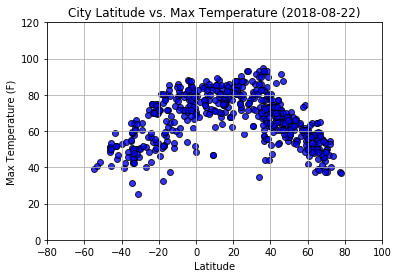

In [10]:
# Build the scatter plot for latitude vs max temperature


#label for x-axis
plt.xlabel("Latitude")
#label for y-axis
plt.ylabel("Max Temperature (F)")

# The y limits of our scatter plot is 0 to 120
plt.ylim(0, 120)

# The x limits of our scatter plot is -80 to 100
plt.xlim(-80, 100)

#add marker, color, edgecolors, alpha and linewidths
latvsmaxtemp =plt.scatter(lat, maxtemp, marker="o",color="blue", edgecolors="black", alpha=0.8, linewidths=1)

# make title
plt.title("City Latitude vs. Max Temperature " +"(" + date_of_analysis + ")")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Images/City_Latitude_vs_MaxTemperature.png")

plt.show()

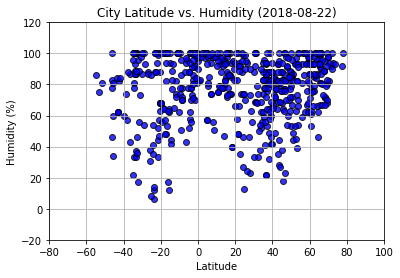

In [11]:
# Build the scatter plot for latitude vs humidity


#label for x-axis
plt.xlabel("Latitude")
#label for y-axis
plt.ylabel("Humidity (%)")

# The y limits of our scatter plot is to -20 to 120
plt.ylim(-20, 120)

# The x limits of our scatter plot is -80 to 100
plt.xlim(-80, 100)

#add marker, color, edgecolors, alpha and linewidths
latvshumidity =plt.scatter(lat, humidity, marker="o",color="blue", edgecolors="black", alpha=0.8, linewidths=1)

# make title
plt.title("City Latitude vs. Humidity " +"(" + date_of_analysis + ")")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Images/City_Latitude_vs_Humidity.png")

plt.show()

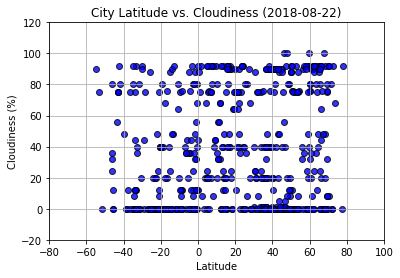

In [12]:
# Build the scatter plot for latitude vs cloudiness


#label for x-axis
plt.xlabel("Latitude")
#label for y-axis
plt.ylabel("Cloudiness (%)")

# The y limits of our scatter plot is to -20 to 120
plt.ylim(-20, 120)

# The x limits of our scatter plot is -80 to 100
plt.xlim(-80, 100)

#add marker, color, edgecolors, alpha and linewidths
latvscloudiness =plt.scatter(lat, cloudiness, marker="o",color="blue", edgecolors="black", alpha=0.8, linewidths=1)

# make title
plt.title("City Latitude vs. Cloudiness " +"(" + date_of_analysis + ")")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Images/City_Latitude_vs_Cloudiness.png")


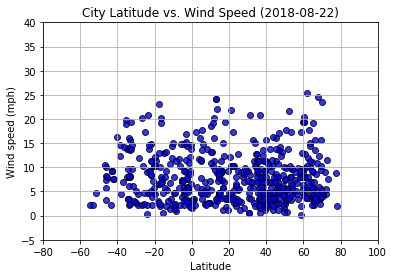

In [13]:
# Build the scatter plot for latitude vs wind speed


#label for x-axis
plt.xlabel("Latitude")
#label for y-axis
plt.ylabel("Wind speed (mph)")

# The y limits of our scatter plot is to -5 to 40
plt.ylim(-5, 40)

# The x limits of our scatter plot is -80 to 100
plt.xlim(-80, 100)

#add marker, color, edgecolors, alpha and linewidths
latvswindspeed =plt.scatter(lat, windspeed, marker="o",color="blue", edgecolors="black", alpha=0.8, linewidths=1)

# make title
plt.title("City Latitude vs. Wind Speed " +"(" + date_of_analysis + ")")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Images/City_Latitude_vs_WindSpeed.png")
